<a href="https://colab.research.google.com/github/GOVINDKS14/Deep-Learning/blob/main/Customer_Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()   # checking number of duplicate rows.

np.int64(0)

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# one hot encoding of categorical columns
df =pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [ ]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3971
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3994
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4080
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4147
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4013
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4053
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4093
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4079
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3939
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4030


In [ ]:
model.layers[0].get_weights()

[array([[ 0.14409484,  0.1560804 , -0.04048413],
        [-3.0843804 , -3.4561472 ,  0.21416686],
        [-0.14894833,  0.10444303,  0.10731384],
        [ 0.03671926, -0.03360149, -0.47666094],
        [ 0.09901262, -0.1228323 ,  0.10593274],
        [-0.288697  ,  0.04211922,  0.16299434],
        [-0.7889903 , -0.92775863,  1.8336117 ],
        [ 0.04248946,  0.06366797, -0.1163222 ],
        [-0.40157846, -0.08785234, -0.5936279 ],
        [-0.13507725,  0.02746419, -0.04806214],
        [ 0.07723869, -0.07168911,  0.72158664]], dtype=float32),
 array([ 0.3862346 ,  0.59056205, -0.20424984], dtype=float32)]

In [ ]:
model.layers[1].get_weights()

[array([[-1.5582031],
        [-1.4077895],
        [-2.6123002]], dtype=float32),
 array([1.2875825], dtype=float32)]

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = np.where(y_log>0.5, 1, 0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.834

In [ ]:
model_2 = Sequential()

model_2.add(Dense(11,activation='relu',input_dim=11))
model_2.add(Dense(11,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model_2.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6939 - loss: 0.6065 - val_accuracy: 0.7975 - val_loss: 0.4826
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7992 - loss: 0.4691 - val_accuracy: 0.7981 - val_loss: 0.4535
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8058 - loss: 0.4308 - val_accuracy: 0.8081 - val_loss: 0.4319
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8134 - loss: 0.4216 - val_accuracy: 0.8175 - val_loss: 0.4134
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8233 - loss: 0.4093 - val_accuracy: 0.8250 - val_loss: 0.3954
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: 0.3773 - val_accuracy: 0.8313 - val_loss: 0.3851
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8480 - loss: 0.3701 - val_accuracy: 0.8394 - val_loss: 0.3763
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8440 - loss: 0.3728 - val_accu

In [ ]:
model_2.layers[1].get_weights()

[array([[-0.5941472 ,  0.27697858, -0.46788907,  0.20926589, -0.58959675,
         -0.6831539 ,  0.6502998 , -0.07667948, -0.41862175, -0.26017016,
          0.22869113],
        [ 0.5062128 , -0.01726764,  0.33257017,  0.17931904,  0.6020862 ,
         -0.04795239, -0.8942373 , -0.7760231 ,  0.77050716, -1.1827376 ,
          0.55169773],
        [-0.10449621,  0.24296564, -0.07619388, -0.02866713, -0.05271717,
          0.67666   ,  0.12636133,  0.05904378, -0.3921755 ,  0.6043453 ,
          0.11705878],
        [-0.5922868 , -0.65211326, -0.5580951 , -0.7380546 , -0.55380964,
          0.26656714, -0.14865187, -0.5828274 , -0.07604891, -0.03166706,
          0.29790345],
        [ 0.574658  ,  0.05509126, -0.18388543,  0.41790104, -0.37456098,
         -0.32523385,  0.36536494,  0.7320513 ,  0.14017768, -0.326692  ,
          0.27631348],
        [-0.08567651,  0.36882472,  0.48286697, -0.0214374 , -0.09505589,
          0.8443534 ,  0.8555861 ,  0.29870105, -0.05816261, -0.4620442

In [ ]:
model_2.layers[1].get_weights()

[array([[-0.5941472 ,  0.27697858, -0.46788907,  0.20926589, -0.58959675,
         -0.6831539 ,  0.6502998 , -0.07667948, -0.41862175, -0.26017016,
          0.22869113],
        [ 0.5062128 , -0.01726764,  0.33257017,  0.17931904,  0.6020862 ,
         -0.04795239, -0.8942373 , -0.7760231 ,  0.77050716, -1.1827376 ,
          0.55169773],
        [-0.10449621,  0.24296564, -0.07619388, -0.02866713, -0.05271717,
          0.67666   ,  0.12636133,  0.05904378, -0.3921755 ,  0.6043453 ,
          0.11705878],
        [-0.5922868 , -0.65211326, -0.5580951 , -0.7380546 , -0.55380964,
          0.26656714, -0.14865187, -0.5828274 , -0.07604891, -0.03166706,
          0.29790345],
        [ 0.574658  ,  0.05509126, -0.18388543,  0.41790104, -0.37456098,
         -0.32523385,  0.36536494,  0.7320513 ,  0.14017768, -0.326692  ,
          0.27631348],
        [-0.08567651,  0.36882472,  0.48286697, -0.0214374 , -0.09505589,
          0.8443534 ,  0.8555861 ,  0.29870105, -0.05816261, -0.4620442

In [ ]:
model_2.layers[2].get_weights()

[array([[ 0.6766024 ],
        [-0.25909007],
        [-0.8393277 ],
        [-0.4537243 ],
        [ 1.2203021 ],
        [-1.1508065 ],
        [ 0.6916557 ],
        [ 0.9907069 ],
        [ 0.82098174],
        [ 1.1478875 ],
        [-0.2579043 ]], dtype=float32),
 array([0.00235389], dtype=float32)]

In [ ]:
y_log_2 = model_2.predict(X_test_scaled)
y_pred_2 = np.where(y_log_2>0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_2)

0.8615

In [ ]:
history = model_2.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8756 - loss: 0.3009 - val_accuracy: 0.8562 - val_loss: 0.3401
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8655 - loss: 0.3198 - val_accuracy: 0.8544 - val_loss: 0.3415
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8724 - loss: 0.3048 - val_accuracy: 0.8531 - val_loss: 0.3415
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8696 - loss: 0.3120 - val_accuracy: 0.8575 - val_loss: 0.3420
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8701 - loss: 0.3162 - val_accuracy: 0.8544 - val_loss: 0.3405
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8676 - loss: 0.3213 - val_accuracy: 0.8562 - val_loss: 0.3417
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8696 - loss: 0.3167 - val_accuracy: 0.8537 - val_loss: 0.3418
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8628 - loss: 0.3235 - val_accu

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history

In [ ]:
history.history

{'accuracy': [0.8668749928474426,
  0.8665624856948853,
  0.8670312762260437,
  0.8671875,
  0.8665624856948853,
  0.8676562309265137,
  0.867968738079071,
  0.8662499785423279,
  0.8678125143051147,
  0.8673437237739563,
  0.8670312762260437,
  0.8673437237739563,
  0.8667187690734863,
  0.8675000071525574,
  0.8671875,
  0.8671875,
  0.8665624856948853,
  0.8692187666893005,
  0.8659374713897705,
  0.8690624833106995,
  0.8662499785423279,
  0.8682812452316284,
  0.867968738079071,
  0.8675000071525574,
  0.8689062595367432,
  0.8682812452316284,
  0.8662499785423279,
  0.8682812452316284,
  0.8671875,
  0.8671875,
  0.8675000071525574,
  0.867968738079071,
  0.8659374713897705,
  0.8676562309265137,
  0.8670312762260437,
  0.8667187690734863,
  0.867968738079071,
  0.8693749904632568,
  0.8681250214576721,
  0.8678125143051147,
  0.8690624833106995,
  0.867968738079071,
  0.8685937523841858,
  0.8660937547683716,
  0.8687499761581421,
  0.867968738079071,
  0.8671875,
  0.8685937523

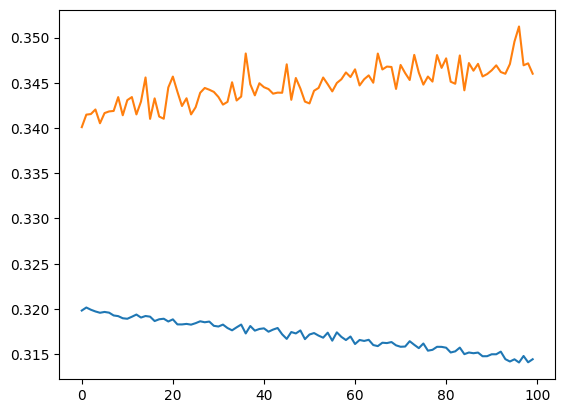

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

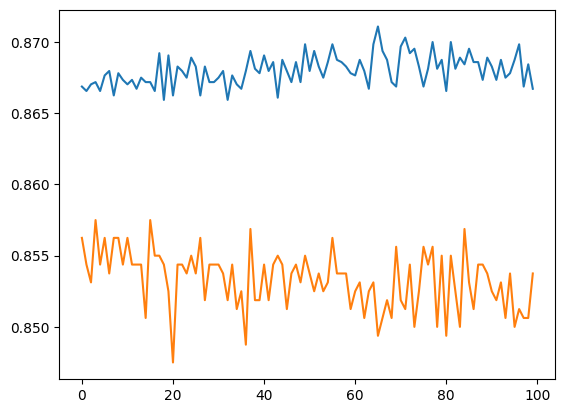

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])